In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

import seaborn as sns
import pandas as pd
import numpy as np

!pip install yellowbrick --upgrade
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer

In [2]:
def create_FreqDistVisualizer(vectors , feature_name , n=50):
    if len(feature_name) < 50:
        n = len(feature_name)
    visualizer = FreqDistVisualizer(features = feature_name , n = n , orient = 'v')
    visualizer.fit(vectors)
    visualizer.show()
    return visualizer

In [3]:
def create_heatmap(similarity , label_x , label_y , cmap = 'YlGnBu'):
    #plt.figure(dpi=200)
    df = pd.DataFrame(similarity)
    df.columns = label_y
    df.index = label_x
    fig , ax = plt.subplots(dpi=70)
    mask = np.zeros_like(similarity)
    #mask[np.triu_indices_from(mask)] = True
    img = sns.heatmap(df , mask=mask , annot=True , cmap=cmap)
    return img.get_figure()

In [4]:
def create_TSNEVisualizer(vectors , labels , decompose_by=50):
    #Create the visualizer and draw the vectors
    if vectors.shape[1] < 50:
        decompose_by = vectors.shape[1] - 1
    tsne = TSNEVisualizer(decompose_by = decompose_by)
    tsne.fit(vectors , labels)
    tsne.show()
    return tsne

In [5]:
#Dataset
text = ['Apple Apple Apple Banana Banana Cherry Cherry Lemon Kiwi Kiwi Kiwi Kiwi',
            'Apple Apple Banana Banana Banana Cherry Cherry Grape',
            'Kiwi Kiwi',
            'Banana Banana Banana Cherry Cherry Kiwi Kiwi Kiwi',
            'Cherry Cherry Cherry Cherry Cherry Kiwi Kiwi',
            'Apple Apple Apple Apple Kiwi Kiwi']

labels = ['doc_%d' %(i+1) for i in range(len(text))]
labels

['doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6']

In [6]:
#Binary
Binary_vectorizer = CountVectorizer(binary=True)
Binary_vectorizer.fit(text)
Binary_feture_name = Binary_vectorizer.get_feature_names_out()

binary_X = Binary_vectorizer.transform(text)

print("feature names : ")
print(Binary_feture_name)

print('doc. by word : ')
print(binary_X.toarray())

print('word by doc. : ')
print(binary_X.transpose().toarray())

feature names : 
['apple' 'banana' 'cherry' 'grape' 'kiwi' 'lemon']
doc. by word : 
[[1 1 1 0 1 1]
 [1 1 1 1 0 0]
 [0 0 0 0 1 0]
 [0 1 1 0 1 0]
 [0 0 1 0 1 0]
 [1 0 0 0 1 0]]
word by doc. : 
[[1 1 0 0 0 1]
 [1 1 0 1 0 0]
 [1 1 0 1 1 0]
 [0 1 0 0 0 0]
 [1 0 1 1 1 1]
 [1 0 0 0 0 0]]


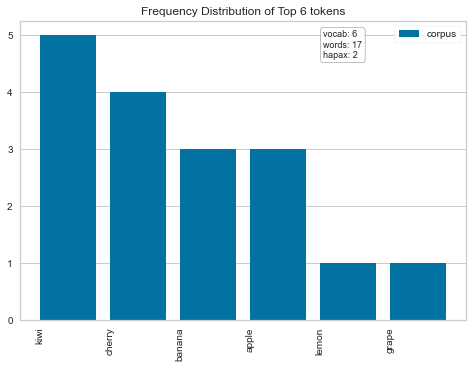

AttributeError: 'FrequencyVisualizer' object has no attribute 'n'

AttributeError: 'FrequencyVisualizer' object has no attribute 'n'

In [7]:
create_FreqDistVisualizer(binary_X , Binary_feture_name)

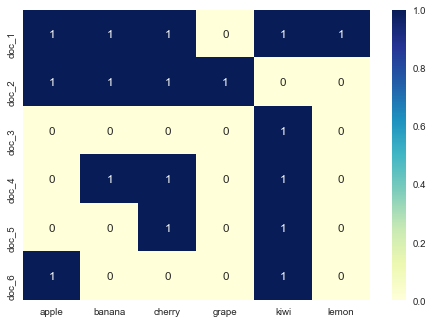

In [8]:
img = create_heatmap(binary_X.toarray() , label_x=labels , label_y=Binary_feture_name)

C:\Users\angus\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\angus\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all point

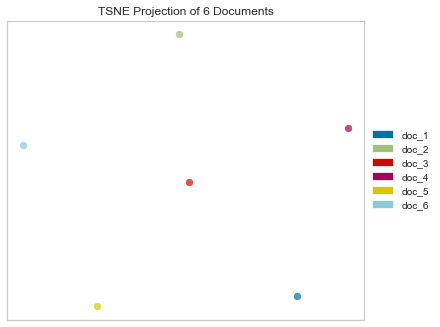

AttributeError: 'TSNEVisualizer' object has no attribute 'classes'

AttributeError: 'TSNEVisualizer' object has no attribute 'classes'

In [9]:
create_TSNEVisualizer(binary_X , labels)

In [10]:
#Term Frequency
TF_vectorizer = CountVectorizer(binary=False)
TF_vectorizer.fit(text)
TF_feature_name = TF_vectorizer.get_feature_names_out()

TF_X = TF_vectorizer.transform(text)

print("feature names : ")
print(TF_feature_name)

print('doc. by word : ')
print(TF_X.toarray())

print('word by doc. : ')
print(TF_X.transpose().toarray())

feature names : 
['apple' 'banana' 'cherry' 'grape' 'kiwi' 'lemon']
doc. by word : 
[[3 2 2 0 4 1]
 [2 3 2 1 0 0]
 [0 0 0 0 2 0]
 [0 3 2 0 3 0]
 [0 0 5 0 2 0]
 [4 0 0 0 2 0]]
word by doc. : 
[[3 2 0 0 0 4]
 [2 3 0 3 0 0]
 [2 2 0 2 5 0]
 [0 1 0 0 0 0]
 [4 0 2 3 2 2]
 [1 0 0 0 0 0]]


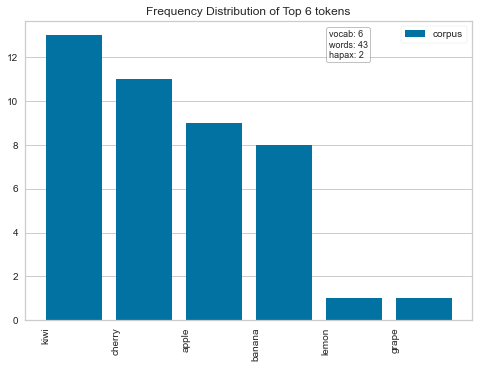

AttributeError: 'FrequencyVisualizer' object has no attribute 'n'

AttributeError: 'FrequencyVisualizer' object has no attribute 'n'

In [11]:
create_FreqDistVisualizer(TF_X , TF_feature_name)

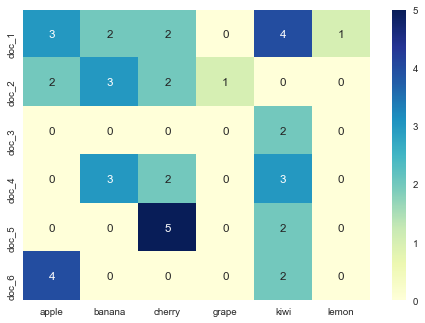

In [12]:
img = create_heatmap(TF_X.toarray() , label_x=labels , label_y=TF_feature_name)

C:\Users\angus\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\angus\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all point

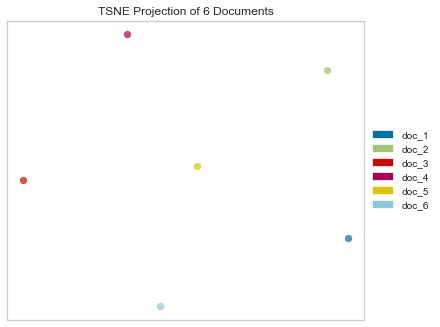

AttributeError: 'TSNEVisualizer' object has no attribute 'classes'

AttributeError: 'TSNEVisualizer' object has no attribute 'classes'

In [13]:
create_TSNEVisualizer(TF_X , labels)

In [16]:
#Term Frequency Inverse Document Frequency
TFIDF_vectorizer = TfidfVectorizer(use_idf = True , norm = None , smooth_idf = False)
TFIDF_vectorizer.fit(text)
TFIDF_feature_name = TFIDF_vectorizer.get_feature_names_out()

TFIDF_X = TFIDF_vectorizer.transform(text)

print("feature names : ")
print(TFIDF_feature_name)

print('doc. by word : ')
print(TFIDF_X.toarray())

print('word by doc. : ')
print(TFIDF_X.transpose().toarray())

feature names : 
['apple' 'banana' 'cherry' 'grape' 'kiwi' 'lemon']
doc. by word : 
[[5.07944154 3.38629436 2.81093022 0.         4.72928623 2.79175947]
 [3.38629436 5.07944154 2.81093022 2.79175947 0.         0.        ]
 [0.         0.         0.         0.         2.36464311 0.        ]
 [0.         5.07944154 2.81093022 0.         3.54696467 0.        ]
 [0.         0.         7.02732554 0.         2.36464311 0.        ]
 [6.77258872 0.         0.         0.         2.36464311 0.        ]]
word by doc. : 
[[5.07944154 3.38629436 0.         0.         0.         6.77258872]
 [3.38629436 5.07944154 0.         5.07944154 0.         0.        ]
 [2.81093022 2.81093022 0.         2.81093022 7.02732554 0.        ]
 [0.         2.79175947 0.         0.         0.         0.        ]
 [4.72928623 0.         2.36464311 3.54696467 2.36464311 2.36464311]
 [2.79175947 0.         0.         0.         0.         0.        ]]


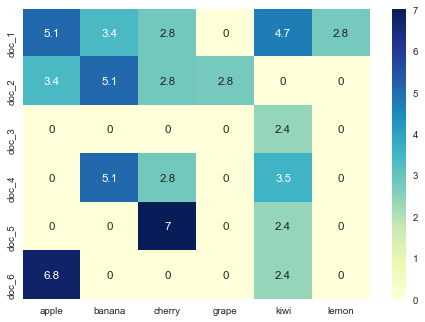

In [17]:
img = create_heatmap(TFIDF_X.toarray() , label_x=labels , label_y=TFIDF_feature_name)

C:\Users\angus\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\angus\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all point

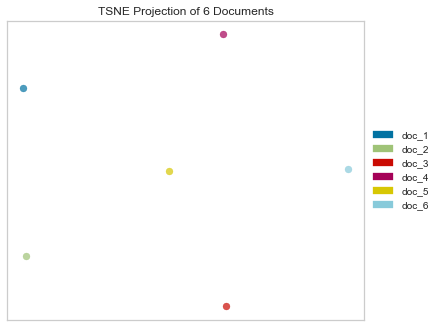

AttributeError: 'TSNEVisualizer' object has no attribute 'classes'

AttributeError: 'TSNEVisualizer' object has no attribute 'classes'

In [18]:
create_TSNEVisualizer(TFIDF_X , labels)

In [19]:
#cosine similarity based on Binary encoding
print('documents by documents')
binary_doc_sim = cosine_similarity(binary_X , binary_X)
print(binary_doc_sim)

print('words by words')
binary_word_sim = cosine_similarity(binary_X.transpose() , binary_X.transpose())
print(binary_word_sim)

documents by documents
[[1.         0.67082039 0.4472136  0.77459667 0.63245553 0.63245553]
 [0.67082039 1.         0.         0.57735027 0.35355339 0.35355339]
 [0.4472136  0.         1.         0.57735027 0.70710678 0.70710678]
 [0.77459667 0.57735027 0.57735027 1.         0.81649658 0.40824829]
 [0.63245553 0.35355339 0.70710678 0.81649658 1.         0.5       ]
 [0.63245553 0.35355339 0.70710678 0.40824829 0.5        1.        ]]
words by words
[[1.         0.66666667 0.57735027 0.57735027 0.51639778 0.57735027]
 [0.66666667 1.         0.8660254  0.57735027 0.51639778 0.57735027]
 [0.57735027 0.8660254  1.         0.5        0.67082039 0.5       ]
 [0.57735027 0.57735027 0.5        1.         0.         0.        ]
 [0.51639778 0.51639778 0.67082039 0.         1.         0.4472136 ]
 [0.57735027 0.57735027 0.5        0.         0.4472136  1.        ]]


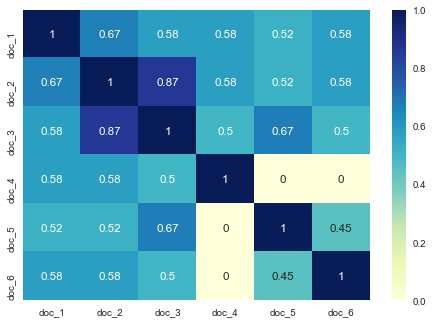

In [20]:
img = create_heatmap(binary_word_sim , label_x=labels , label_y=labels)

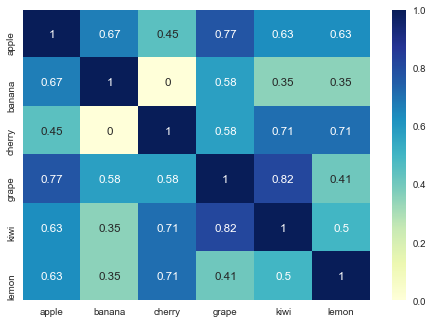

In [21]:
img = create_heatmap(binary_doc_sim , label_x=Binary_feture_name , label_y=Binary_feture_name)

In [22]:
#cosine similarity based on TF encoding
print('documents by documents')
TF_doc_sim = cosine_similarity(TF_X , TF_X)
print(TF_doc_sim)

print('words by words')
TF_word_sim = cosine_similarity(TF_X.transpose() , TF_X.transpose())
print(TF_word_sim)

documents by documents
[[1.         0.64676167 0.68599434 0.80439967 0.57323678 0.76696499]
 [0.64676167 1.         0.         0.65327458 0.43768811 0.42163702]
 [0.68599434 0.         1.         0.63960215 0.37139068 0.4472136 ]
 [0.80439967 0.65327458 0.63960215 1.         0.63344607 0.28603878]
 [0.57323678 0.43768811 0.37139068 0.63344607 1.         0.16609096]
 [0.76696499 0.42163702 0.4472136  0.28603878 0.16609096 1.        ]]
words by words
[[1.         0.47508455 0.30528126 0.37139068 0.61056251 0.55708601]
 [0.47508455 1.         0.56079971 0.63960215 0.59584969 0.42640143]
 [0.30528126 0.56079971 1.         0.32879797 0.64864865 0.32879797]
 [0.37139068 0.63960215 0.32879797 1.         0.         0.        ]
 [0.61056251 0.59584969 0.64864865 0.         1.         0.65759595]
 [0.55708601 0.42640143 0.32879797 0.         0.65759595 1.        ]]


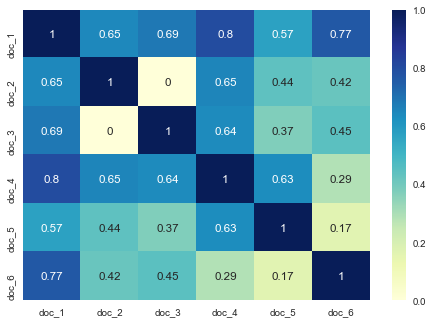

In [23]:
img = create_heatmap(TF_doc_sim , label_x=labels , label_y=labels)

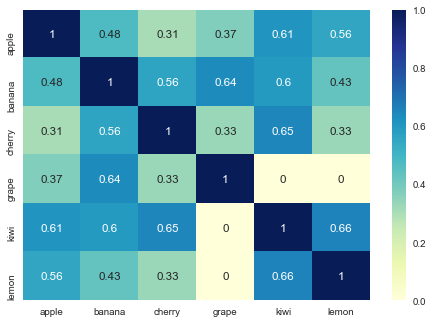

In [24]:
img = create_heatmap(TF_word_sim , label_x=TF_feature_name , label_y=TF_feature_name)

In [25]:
#cosine similarity based on TFIDF encoding
print('documents by documents')
TFIDF_doc_sim = cosine_similarity(TFIDF_X , TFIDF_X)
print(TFIDF_doc_sim)

print('words by words')
TFIDF_word_sim = cosine_similarity(TFIDF_X.transpose() , TFIDF_X.transpose())
print(TFIDF_word_sim)

documents by documents
[[1.         0.66972479 0.54489669 0.70921408 0.48073561 0.73214761]
 [0.66972479 1.         0.         0.68070576 0.36607662 0.43929929]
 [0.54489669 0.         1.         0.52137001 0.31892136 0.32963464]
 [0.70921408 0.68070576 0.52137001 1.         0.55788023 0.17186162]
 [0.48073561 0.36607662 0.31892136 0.55788023 1.         0.10512753]
 [0.73214761 0.43929929 0.32963464 0.17186162 0.10512753 1.        ]]
words by words
[[1.         0.47508455 0.30528126 0.37139068 0.61056251 0.55708601]
 [0.47508455 1.         0.56079971 0.63960215 0.59584969 0.42640143]
 [0.30528126 0.56079971 1.         0.32879797 0.64864865 0.32879797]
 [0.37139068 0.63960215 0.32879797 1.         0.         0.        ]
 [0.61056251 0.59584969 0.64864865 0.         1.         0.65759595]
 [0.55708601 0.42640143 0.32879797 0.         0.65759595 1.        ]]


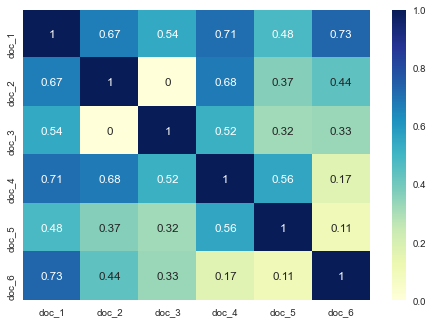

In [26]:
img = create_heatmap(TFIDF_doc_sim , label_x=labels , label_y=labels)

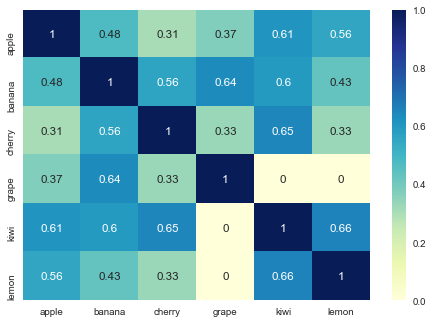

In [27]:
img = create_heatmap(TFIDF_word_sim , label_x=TFIDF_feature_name , label_y=TFIDF_feature_name)